In [1]:

import tensorflow as tf
from tensorflow.keras.applications import MobileNet
import numpy as np
import keras
import os
import cv2
from PIL import Image
import numpy as np
from google.colab import drive
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, GlobalAveragePooling2D, Input, InputLayer, BatchNormalization
drive.mount("/content/drive")
from matplotlib import pyplot as plt

Mounted at /content/drive


In [4]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/MyDrive/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/MyDrive/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/MyDrive/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/MyDrive/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [5]:
Cells=np.array(data)
labels=np.array(labels)

In [6]:
np.save("Cells",Cells)
np.save("labels",labels)

In [7]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [8]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [9]:
num_classes=len(np.unique(labels))
len_data=len(Cells)
print(num_classes)
print(len_data)

2
27608


In [10]:
(x_train,x_test)=Cells[(int)(0.2*len_data):],Cells[:(int)(0.2*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [11]:
print(x_train.shape)
print(x_train[0].shape)

(22087, 50, 50, 3)
(50, 50, 3)


MobileNet edited 1

In [12]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

drop_layers = [1,2,3,4,5,6,7,8,9,10]

input_layer = x = base_model.input

for i, layer in enumerate(base_model.layers[1:], 1):
    if i in drop_layers:
        x = layer(x)

x = GlobalAveragePooling2D()(x)

x = keras.layers.Dense(2, activation="softmax")(x)

model = keras.models.Model(inputs = input_layer, outputs = x)

for layer in model.layers[0:4]:
    layer.trainable = False

del base_model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 25, 25, 32)        0     

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=25,epochs=20,validation_split = 0.2, verbose=1)

Epoch 1/20
707/707 [==============================] - 36s 50ms/step - loss: 0.6199 - accuracy: 0.6656 - val_loss: 0.5581 - val_accuracy: 0.7888
Epoch 2/20
707/707 [==============================] - 35s 49ms/step - loss: 0.4657 - accuracy: 0.8169 - val_loss: 0.3732 - val_accuracy: 0.8511
Epoch 3/20
707/707 [==============================] - 35s 49ms/step - loss: 0.3406 - accuracy: 0.8755 - val_loss: 0.5070 - val_accuracy: 0.7381
Epoch 4/20
707/707 [==============================] - 35s 50ms/step - loss: 0.2959 - accuracy: 0.8947 - val_loss: 0.2556 - val_accuracy: 0.9221
Epoch 5/20
707/707 [==============================] - 35s 50ms/step - loss: 0.2724 - accuracy: 0.8987 - val_loss: 0.7397 - val_accuracy: 0.5819
Epoch 6/20
707/707 [==============================] - 36s 50ms/step - loss: 0.2583 - accuracy: 0.9107 - val_loss: 0.5002 - val_accuracy: 0.7784
Epoch 7/20
707/707 [==============================] - 36s 51ms/step - loss: 0.2410 - accuracy: 0.9132 - val_loss: 0.3656 - val_accuracy:

In [14]:
from keras.models import load_model
model.save('/content/drive/My Drive/mobilenet4.h5')

2 blocks

In [15]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

drop_layers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

input_layer = x = base_model.input

for i, layer in enumerate(base_model.layers[1:], 1):
    if i in drop_layers:
        x = layer(x)

x = GlobalAveragePooling2D()(x)

x = keras.layers.Dense(2, activation="softmax")(x)

model = keras.models.Model(inputs = input_layer, outputs = x)

for layer in model.layers[0:4]:
    layer.trainable = False

del base_model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 25, 25, 32)        0   

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=25,epochs=20,validation_split = 0.2, verbose=1)

Epoch 1/20
707/707 [==============================] - 63s 87ms/step - loss: 0.5621 - accuracy: 0.7026 - val_loss: 0.5570 - val_accuracy: 0.7028
Epoch 2/20
707/707 [==============================] - 57s 81ms/step - loss: 0.2583 - accuracy: 0.8965 - val_loss: 0.3375 - val_accuracy: 0.8717
Epoch 3/20
707/707 [==============================] - 57s 81ms/step - loss: 0.2127 - accuracy: 0.9215 - val_loss: 0.5984 - val_accuracy: 0.8033
Epoch 4/20
707/707 [==============================] - 57s 81ms/step - loss: 0.1829 - accuracy: 0.9342 - val_loss: 0.1775 - val_accuracy: 0.9423
Epoch 5/20
707/707 [==============================] - 58s 82ms/step - loss: 0.1713 - accuracy: 0.9387 - val_loss: 0.2693 - val_accuracy: 0.9049
Epoch 6/20
707/707 [==============================] - 61s 86ms/step - loss: 0.1655 - accuracy: 0.9418 - val_loss: 0.2909 - val_accuracy: 0.8825
Epoch 7/20
707/707 [==============================] - 59s 84ms/step - loss: 0.1468 - accuracy: 0.9451 - val_loss: 0.1721 - val_accuracy:

In [17]:
from keras.models import load_model
model.save('/content/drive/My Drive/mobilenet_2blocks.h5')

3 blocks

In [18]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

drop_layers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23]

input_layer = x = base_model.input

for i, layer in enumerate(base_model.layers[1:], 1):
    if i in drop_layers:
        x = layer(x)

x = GlobalAveragePooling2D()(x)

x = keras.layers.Dense(2, activation="softmax")(x)

model = keras.models.Model(inputs = input_layer, outputs = x)

for layer in model.layers[0:4]:
    layer.trainable = False

del base_model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 25, 25, 32)        0   

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=25,epochs=20,validation_split = 0.2, verbose=1)

Epoch 1/20
707/707 [==============================] - 72s 99ms/step - loss: 0.3928 - accuracy: 0.8203 - val_loss: 0.2726 - val_accuracy: 0.9203
Epoch 2/20
707/707 [==============================] - 69s 98ms/step - loss: 0.1755 - accuracy: 0.9402 - val_loss: 0.1769 - val_accuracy: 0.9373
Epoch 3/20
707/707 [==============================] - 70s 99ms/step - loss: 0.1575 - accuracy: 0.9455 - val_loss: 0.2250 - val_accuracy: 0.9341
Epoch 4/20
707/707 [==============================] - 73s 103ms/step - loss: 0.1472 - accuracy: 0.9500 - val_loss: 0.1369 - val_accuracy: 0.9511
Epoch 5/20
707/707 [==============================] - 71s 101ms/step - loss: 0.1288 - accuracy: 0.9555 - val_loss: 0.2110 - val_accuracy: 0.9330
Epoch 6/20
707/707 [==============================] - 71s 101ms/step - loss: 0.1282 - accuracy: 0.9560 - val_loss: 0.1783 - val_accuracy: 0.9473
Epoch 7/20
707/707 [==============================] - 70s 99ms/step - loss: 0.1177 - accuracy: 0.9591 - val_loss: 0.1405 - val_accura

In [20]:
from keras.models import load_model
model.save('/content/drive/My Drive/mobilenet_3blocks.h5')

Original

In [21]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(2, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy', 'mae'])
model.summary()


model.compile(optimizer='rmsprop', loss = 'binary_crossentropy',
                           metrics = ['accuracy', 'mae'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 25, 25, 32)        0   

In [25]:
history = model.fit(x_train,y_train,batch_size=50,epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
354/354 [==============================] - 292s 825ms/step - loss: 0.2283 - accuracy: 0.9145 - mae: 0.1277 - val_loss: 0.6852 - val_accuracy: 0.5319 - val_mae: 0.4515
Epoch 2/10
354/354 [==============================] - 291s 822ms/step - loss: 0.1580 - accuracy: 0.9488 - mae: 0.0830 - val_loss: 0.7297 - val_accuracy: 0.9156 - val_mae: 0.0897
Epoch 3/10
354/354 [==============================] - 288s 815ms/step - loss: 0.1420 - accuracy: 0.9540 - mae: 0.0738 - val_loss: 0.3595 - val_accuracy: 0.9131 - val_mae: 0.0962
Epoch 4/10
354/354 [==============================] - 290s 819ms/step - loss: 0.1322 - accuracy: 0.9570 - mae: 0.0696 - val_loss: 0.2178 - val_accuracy: 0.9531 - val_mae: 0.0516
Epoch 5/10
354/354 [==============================] - 288s 813ms/step - loss: 0.1256 - accuracy: 0.9577 - mae: 0.0662 - val_loss: 0.3353 - val_accuracy: 0.8533 - val_mae: 0.1590
Epoch 6/10
354/354 [==============================] - 291s 821ms/step - loss: 0.1162 - accuracy: 0.9609 - mae:

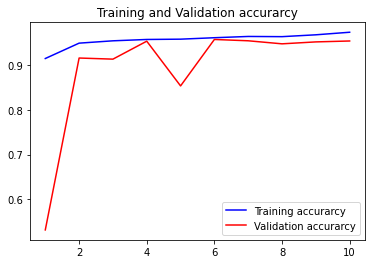

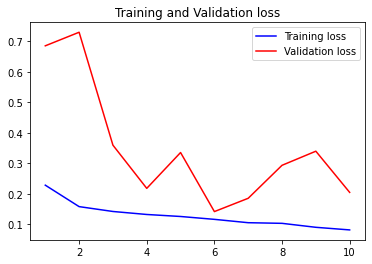

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()

In [27]:
from keras.models import load_model
model.save('/content/drive/My Drive/cells_new.h5')

Оценка точностей моделей

In [28]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/cells_new.h5') # Original
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

model = load_model('/content/drive/My Drive/mobilenet4.h5') # 1 block edited v2
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

model = load_model('/content/drive/My Drive/mobilenet_2blocks.h5') # 2 blocks
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

model = load_model('/content/drive/My Drive/mobilenet_3blocks.h5') # 3 blocks
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

173/173 [==============================] - 12s 69ms/step - loss: 0.2217 - accuracy: 0.9525 - mae: 0.0553

 Test_Accuracy:- 0.9525448083877563
173/173 [==============================] - 3s 18ms/step - loss: 0.1783 - accuracy: 0.9400

 Test_Accuracy:- 0.9400470852851868
173/173 [==============================] - 5s 27ms/step - loss: 0.2303 - accuracy: 0.9243

 Test_Accuracy:- 0.9242891073226929
173/173 [==============================] - 6s 30ms/step - loss: 0.1651 - accuracy: 0.9506

 Test_Accuracy:- 0.9505524635314941


1/1 [==============================] - 0s 157ms/step
Uninfected 
Probability =  0.9999497


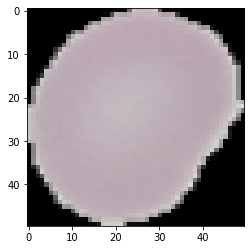

In [35]:
import os
from keras.models import load_model
import random
import cv2
def convert_to_array(img):
    im = cv2.imread(img)
    img_ = Image.fromarray(im, 'RGB')
    image = img_.resize((50, 50))
    return np.array(image)

def get_cell_name(label):
    if label==0:
        return "Paracitized"
    if label==1:
        return "Uninfected"


model= load_model('/content/drive/My Drive/mobilenet_3blocks.h5')


label=1
a=[]

img = x_train[random.randint(0, len(x_train)-1)]
img= np.expand_dims(img, axis=0)
plt.imshow(img[0])


a.append(img[0])
a=np.array(a)
score=model.predict(a,verbose=1)
label_index=np.argmax(score)
acc=np.max(score)
Cell=get_cell_name(label_index)
print(Cell,"\nProbability =  "+ str(acc))

In [36]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 25, 25, 32)        0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


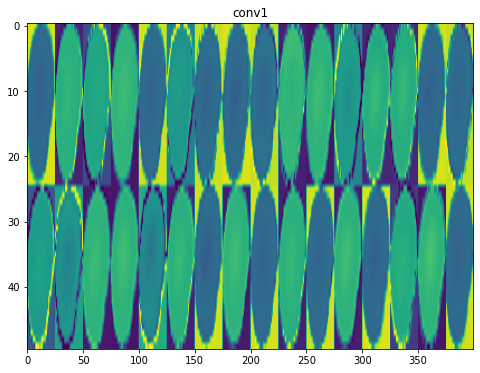

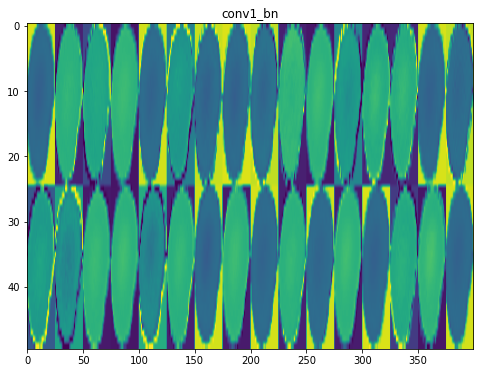

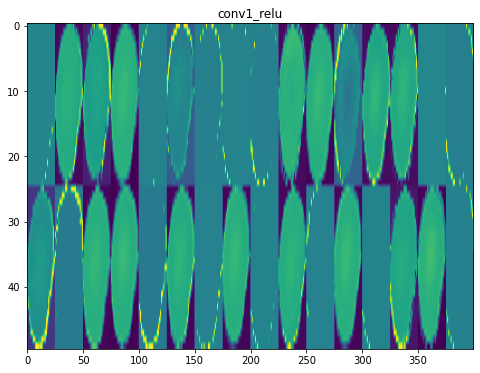

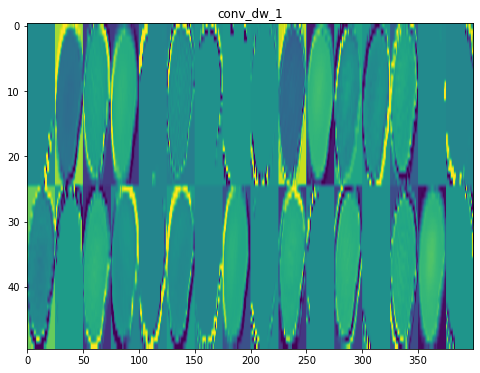

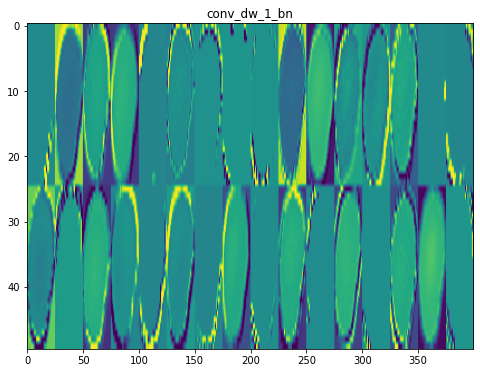

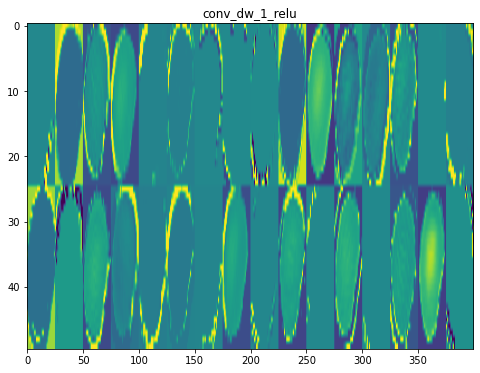

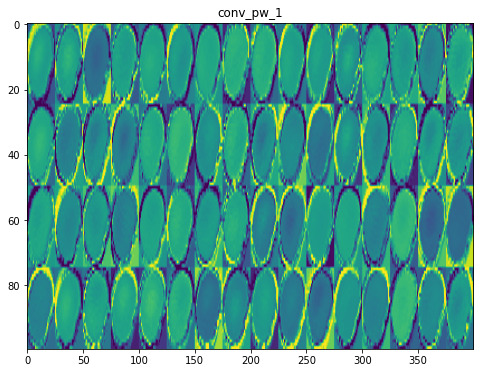

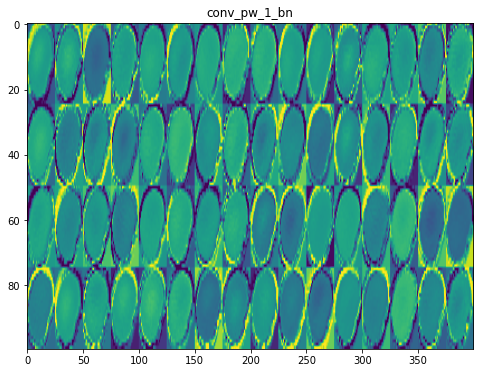

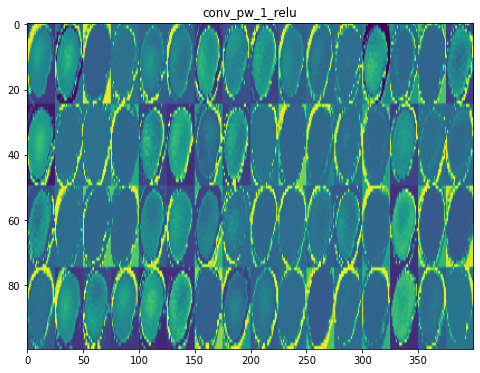

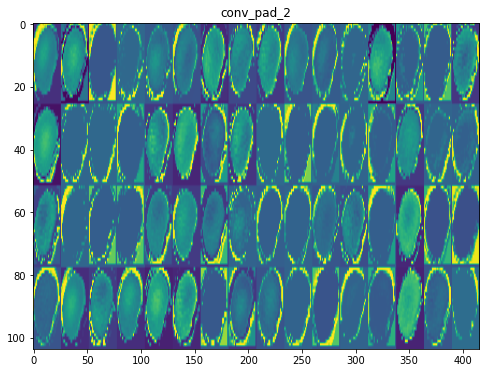

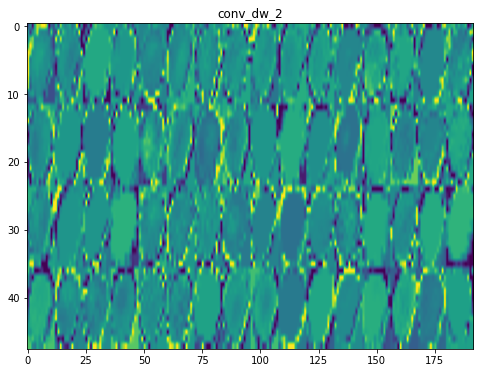

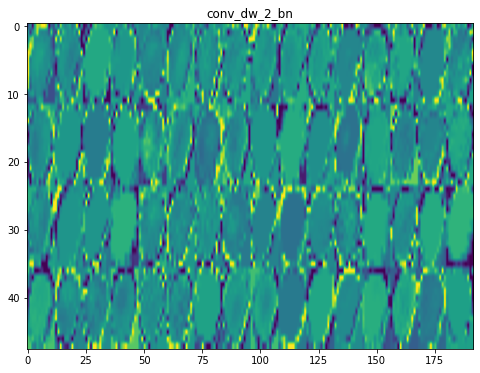

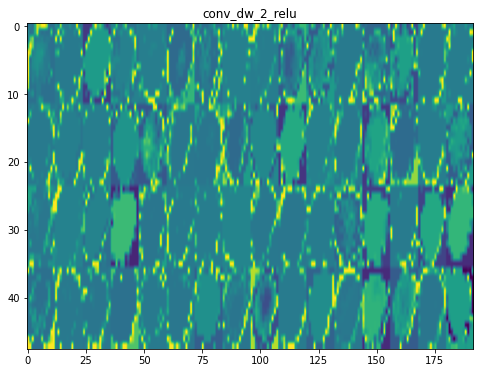

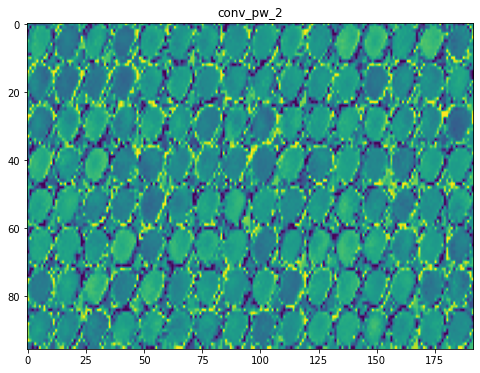

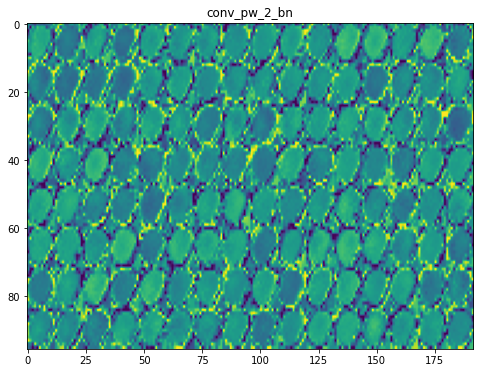

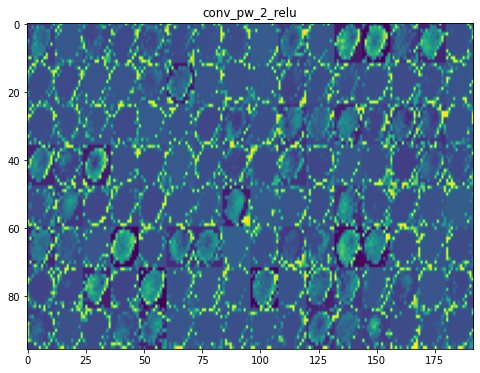

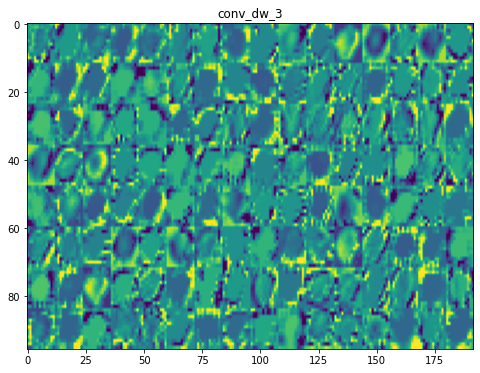

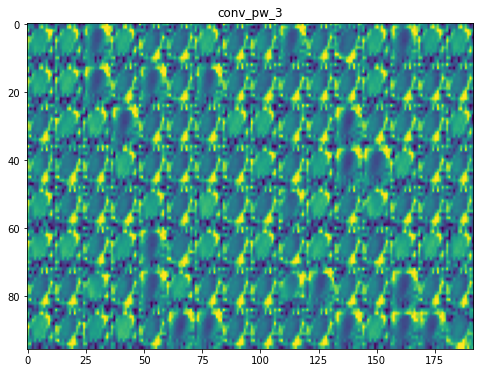

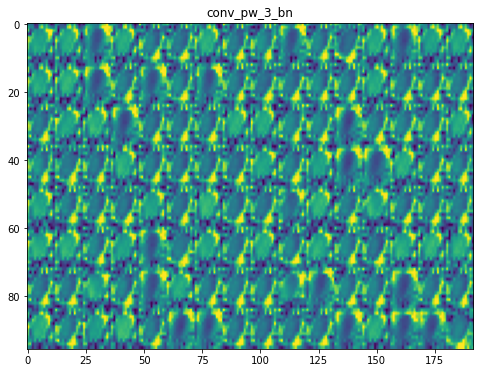

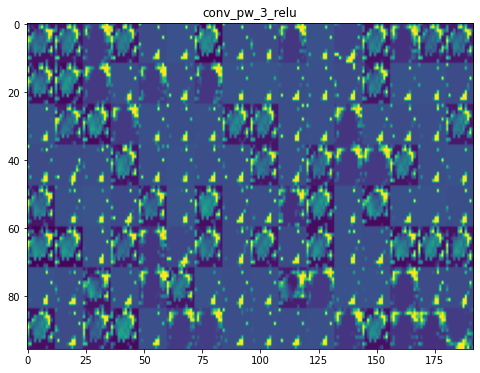

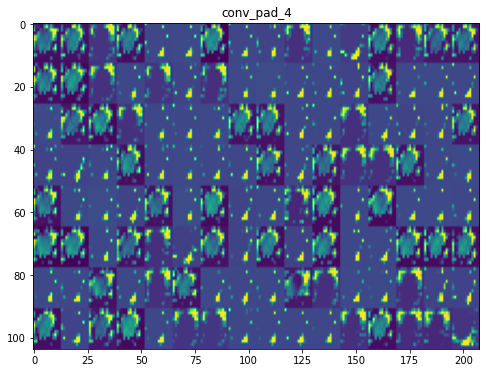

In [37]:
model.summary()

# получения нескольких выходов на предсказании
activations = activation_model.predict(img)
# список всех слоев сети
layer_names = [layer.name for layer in model.layers]


# так как карта признаков извлекает 32 * k признаков, то берем число, которому
# 32 кратно просто для красоты
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  # выводить необходимо только сверточные слои
  if 'conv' not in layer_name:
    continue
  # карта признаков имеет форму (1, size, size, n_features)
  # берем только последнюю ось тензора
  n_features = layer_activation.shape[-1]
  # берем только первую ось тензора
  size = layer_activation.shape[1]

  # количество строчек в таблице отображений
  n_cols = n_features // images_per_row
  # сама таблица инициализируется нулями
  display_grid = np.zeros((size * n_cols, size * images_per_row))

  # обычный вложенный цикл, как в двумерной матрице
  for col in range(n_cols):
    for row in range(images_per_row):
      # это - каждый маленький квадрат в таблице отображений
      # берется каждый признак из последней оси активации (которая кратна 32)
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      # обработка изображения для приемлемого вида
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
  
  # size - размер каждого квадратного изображения без уменьшения
  scale = 1. / size
  # уменьшаем размер общей сетки отображений, чтобы все картинки поместились на ней
  #plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.figure(figsize=(8,6))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')